In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from mlxtend.plotting import scatterplotmatrix
import seaborn as sb
import plotly.express as px
from sklearn.model_selection import train_test_split 
from sklearn.metrics.cluster import completeness_score
import datetime
import math
import plotly.express as px
from sklearn import tree

In [2]:
df = pd.read_csv("C:/Users/Victus/Desktop/flavors_of_cacao.csv", delimiter=',', low_memory=False)
print(df.info())
df = df.dropna()
print(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Company 
(Maker-if known)         1795 non-null   object 
 1   Specific Bean Origin
or Bar Name  1795 non-null   object 
 2   REF                               1795 non-null   int64  
 3   Review
Date                       1795 non-null   int64  
 4   Cocoa
Percent                     1795 non-null   object 
 5   Company
Location                  1795 non-null   object 
 6   Rating                            1795 non-null   float64
 7   Bean
Type                         1794 non-null   object 
 8   Broad Bean
Origin                 1794 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB
None
     Company \n(Maker-if known) Specific Bean Origin\nor Bar Name   REF  \
0                      A. Morin                       Agu

In [3]:
sas1 = [*df['REF'].values]
sas2 = [*df['Review\nDate'].values]
sas4 = [*df['Rating'].values]

<Axes: >

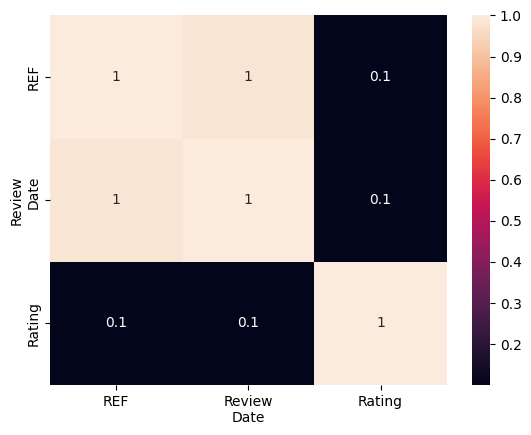

In [4]:
df_new = pd.DataFrame({'REF': sas1, 'Review\nDate': sas2, 'Rating': sas4})
sb.heatmap(df_new.corr(), annot = True, fmt='.1g')

In [5]:
y_pred = [0, 1, 2, 3, 5, 6, 0, 6, 7, 8, 8]
y_true = [0, 1, 2, 3, 3, 6, 0, 1, 7, 8, 8]

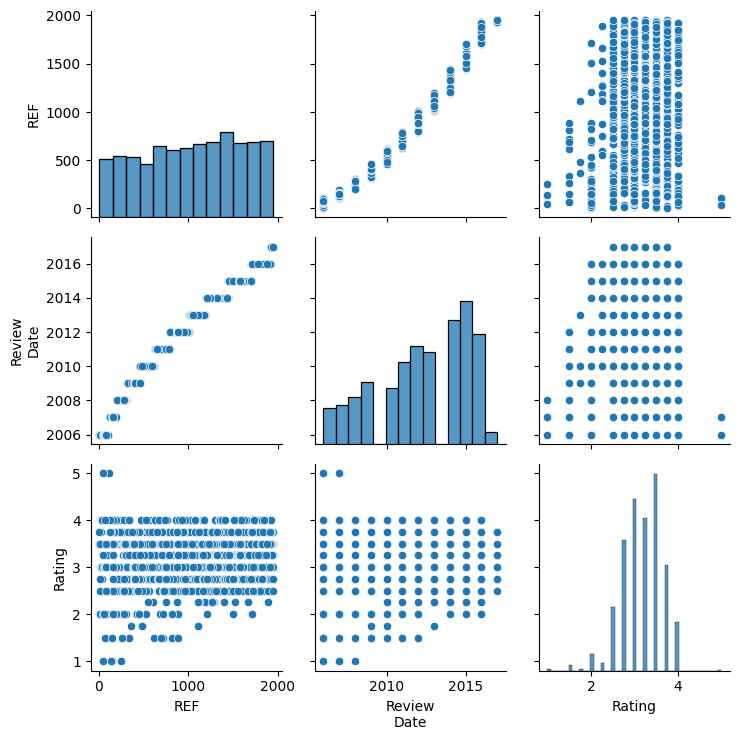

In [6]:
sb.pairplot(df_new) 
plt.tight_layout()

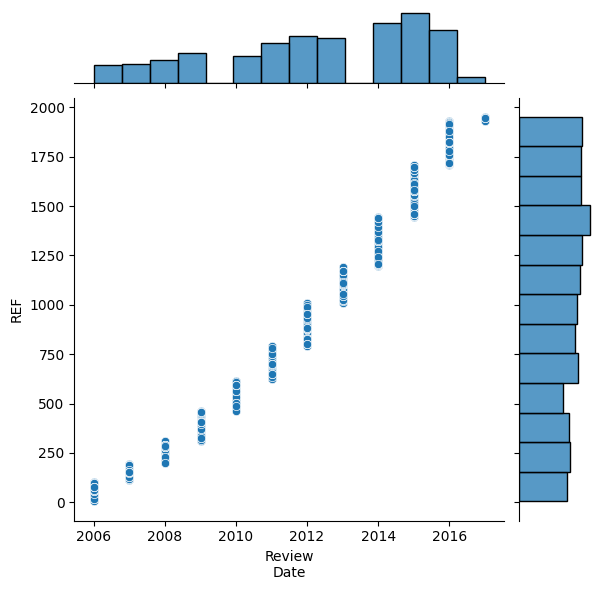

In [7]:
sas1 = [*df['Review\nDate'].values]
sas2 = [*df['REF'].values]
df_new = pd.DataFrame({'Review\nDate': sas1, 'REF': sas2})
sb.jointplot(x='Review\nDate', y='REF', data=df_new, kind='scatter');

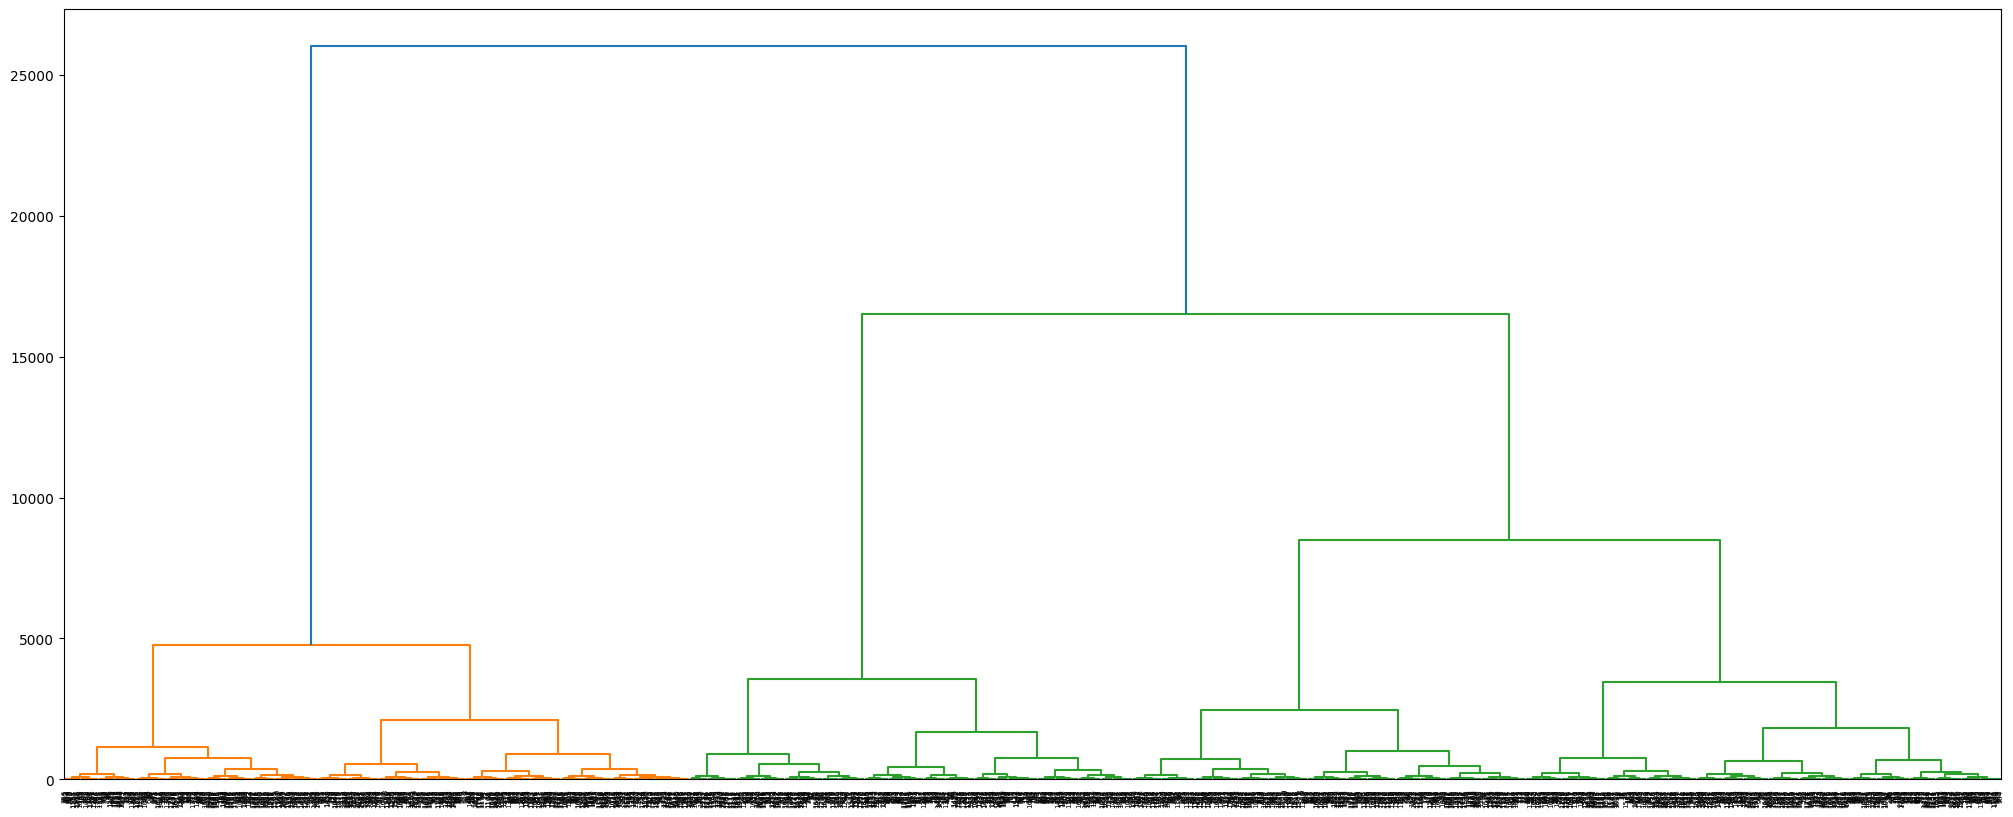

In [8]:
from scipy.cluster.hierarchy import linkage, dendrogram
cluster_ar = linkage(df_new, method='ward', metric='euclidean')
link_df = pd.DataFrame(cluster_ar, index=[f' step {i+1}' for i in range(cluster_ar.shape[0])],columns=['cluster', 'cluster 2', 'dist', 'number elements'])

fig = plt.figure(figsize=(25, 10))
row_dendr = dendrogram(link_df)

<Axes: xlabel='Review\nDate', ylabel='REF'>

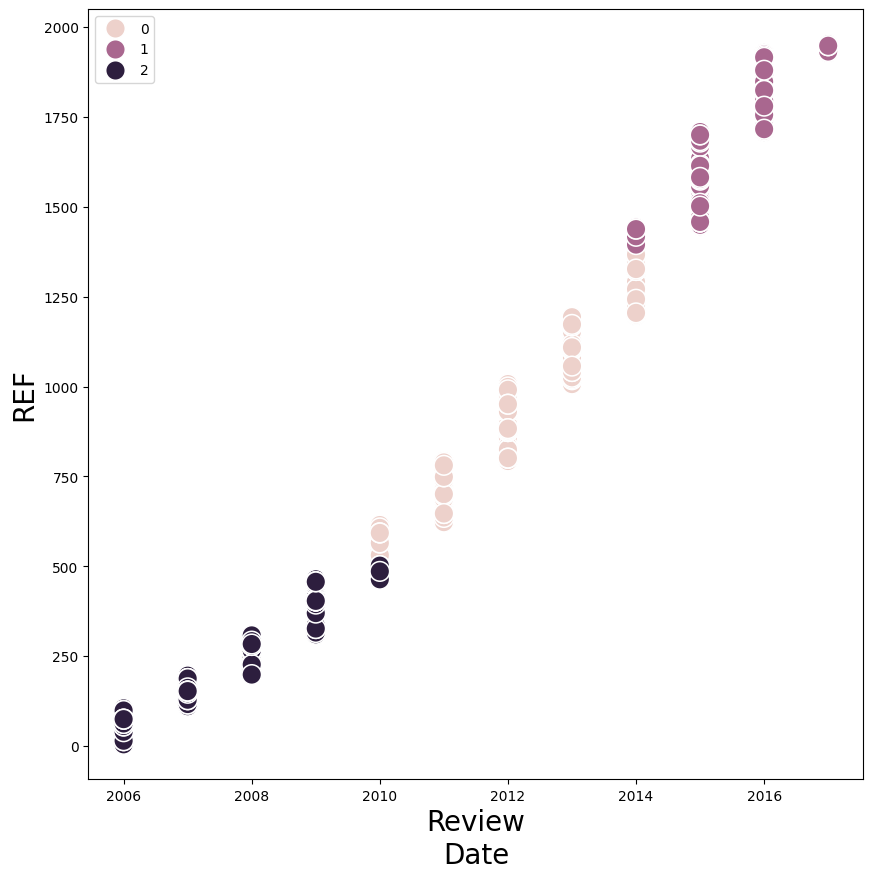

In [9]:
from sklearn.cluster import AgglomerativeClustering
cl = AgglomerativeClustering(n_clusters=3, linkage = 'ward')
labels = cl.fit_predict(df_new)
plt.figure(figsize=(10,10))
plt.rc('axes', labelsize=20)
sb.color_palette("Paired")
plt.rcParams['scatter.marker'] = 'o'
sb.scatterplot(data=df_new, x='Review\nDate', y='REF', hue=labels, s = 200)

<Axes: xlabel='Review\nDate', ylabel='REF'>

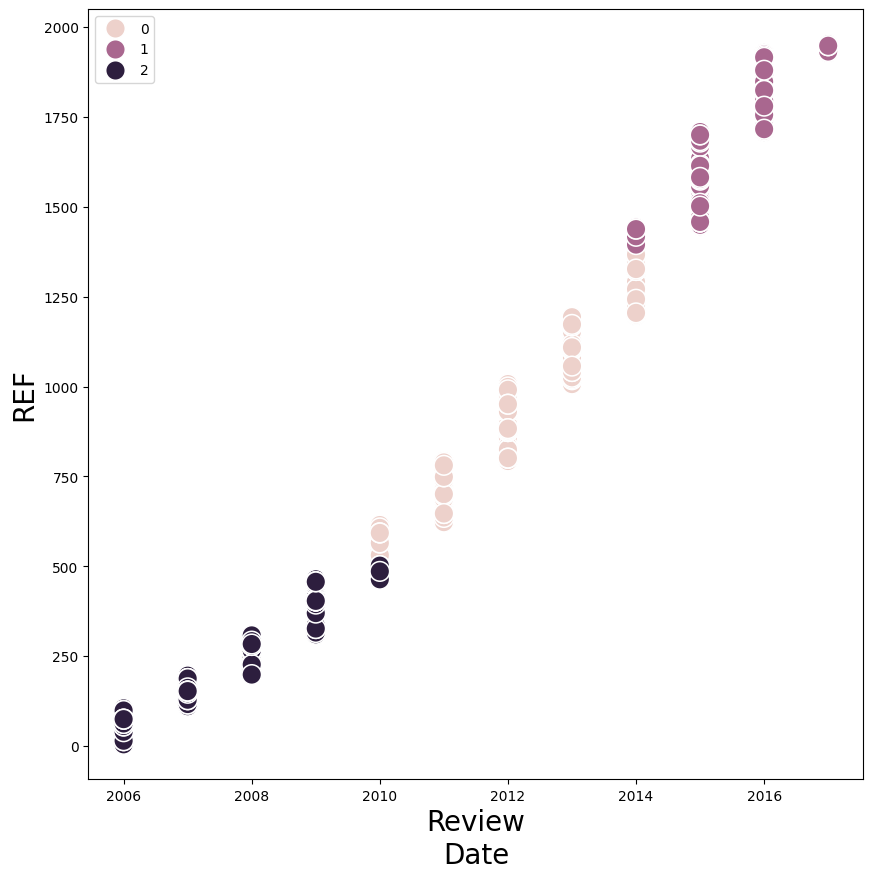

In [10]:
from sklearn.cluster import AgglomerativeClustering
cla = AgglomerativeClustering(n_clusters=3, linkage = 'complete')
labels1 = cla.fit_predict(df_new)
plt.figure(figsize=(10,10))
plt.rc('axes', labelsize=20)
sb.color_palette("Paired")
plt.rcParams['scatter.marker'] = 'o'
sb.scatterplot(data=df_new, x='Review\nDate', y='REF', hue=labels, s = 200)

In [11]:
print(labels1)

[1 1 1 ... 0 0 2]


In [12]:
import sklearn.metrics
import numpy
r = sklearn.metrics.confusion_matrix(labels1, labels)
r = numpy.flip(r)
print(r)

[[403   0   0]
 [  0 579  82]
 [  7   0 722]]


LogisticRegression: ROC AUC=0.903


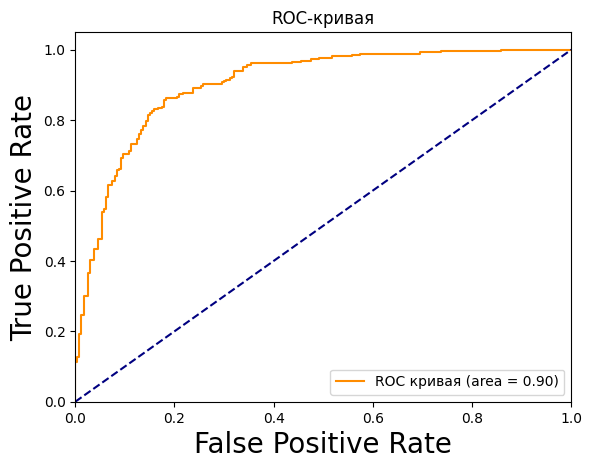

In [13]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt
# генерируем датасет на 2 класса
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# разделяем его на 2 выборки
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# обучаем модель
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# получаем предказания
lr_probs = model.predict_proba(testX)
# сохраняем вероятности только для положительного исхода
lr_probs = lr_probs[:, 1]
# рассчитываем ROC AUC
lr_auc = roc_auc_score(testy, lr_probs)
print('LogisticRegression: ROC AUC=%.3f' % (lr_auc))
# рассчитываем roc-кривую
fpr, tpr, treshold = roc_curve(testy, lr_probs)
roc_auc = auc(fpr, tpr)
# строим график
plt.plot(fpr, tpr, color='darkorange',
         label='ROC кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc="lower right")
plt.show()

In [14]:
import numpy as np 
def mean_squared_error(act, pred):

   diff = pred - act 
   differences_squared = diff ** 2 
   mean_diff = differences_squared.mean() 
   
   return mean_diff

act = np.array([1.1,2,1.7]) 
pred = np.array([1,1.7,1.5])

print(mean_squared_error(act,pred)) 

0.04666666666666667


In [17]:
import sklearn
from sklearn.metrics import accuracy_score
print(accuracy_score(y_true, y_pred))

0.8181818181818182
